In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.datasets import make_regression

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Cross validation

In [2]:
# parameter k - number of splits (folds)

# good for limited sample data
# less biased then typical train/test split method
# can help answer the question whether the model is better or is overfitted

# https://scikit-learn.org/stable/modules/cross_validation.html
![crossvalidation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

## Data

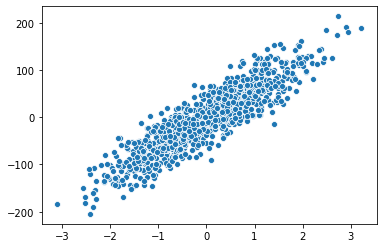

In [3]:
X, y = make_regression(n_samples=1000, n_features=1, noise=30)
X = X.reshape(-1, 1)
plot = sns.scatterplot(X.ravel(), y.ravel())

In [4]:
labels = np.random.randint(5, size=1000)
labels[:10]

array([4, 1, 4, 0, 4, 0, 1, 0, 0, 0])

## Model

In [5]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor


from sklearn import metrics
from sklearn import model_selection

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [6]:
lin = svm.SVR(kernel='linear', C=1)
rfr = RandomForestRegressor()

## Cross-validation

In [7]:
scores_lin = cross_val_score(lin, X, y, scoring='neg_mean_squared_error', cv=5) # groups for stratification?
scores_rfr = cross_val_score(rfr, X, y, scoring='neg_mean_squared_error', cv=5)

print(scores_lin)
print("MSE: %0.2f (+/- %0.2f)" % (scores_lin.mean(), scores_lin.std() * 2))

print(scores_rfr)
print("MSE: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))

[ -729.90739626  -972.86371845  -887.08455395 -1080.58496058
  -689.16745708]
MSE: -871.92 (+/- 293.29)
[-1240.2089998  -1257.40059551 -1250.34815517 -1295.22089668
 -1015.37727556]
MSE: -1211.71 (+/- 199.83)


In [8]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# ~

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Linear model

In [10]:
scores_cycle = []
for i in range(5):
    model = svm.SVR(kernel='linear', C=1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores_cycle.append(mean_squared_error(y_test, y_pred))
    
scores_cycle
print("MSE: %0.2f (+/- %0.2f)" % (np.mean(scores_cycle), np.std(scores_cycle) * 2))

MSE: 910.39 (+/- 0.00)


### Random Forest

In [11]:
scores_cycle = []
for i in range(5):
    model = RandomForestRegressor().fit(X_train, y_train) #random_state=0
    y_pred = model.predict(X_test)
    
    scores_cycle.append(mean_squared_error(y_test, y_pred))
    
scores_cycle
print("MSE: %0.2f (+/- %0.2f)" % (np.mean(scores_cycle), np.std(scores_cycle) * 2))

MSE: 1373.58 (+/- 21.60)


# Cross-validation types

### ~ Leave one out cv
#### one data point for testing
#### low bias, higher variation - since we are testing against just one datapoing (could be even outlier)

In [12]:
loocv = model_selection.LeaveOneOut()
model_loocv = svm.SVR(kernel='linear', C=1)

scores_loocv = cross_val_score(model_loocv, X, y, cv=loocv, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores_loocv.mean(), scores_loocv.std() * 2))

MSE: -870.92 (+/- 2347.72)


### ~ Stratified k-fold
### in sklearn model_selection.StratifiedKFold() is for classification

### ~ Repeated Random Test-Train Splits

In [13]:
kfolds = model_selection.ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
model_shuffle = svm.SVR(kernel='linear', C=1)

scores_repeated_splits = cross_val_score(model_shuffle, X, y, cv=kfolds, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores_repeated_splits.mean(), scores_repeated_splits.std() * 2))

MSE: -897.76 (+/- 231.67)


# Distribution of the scores

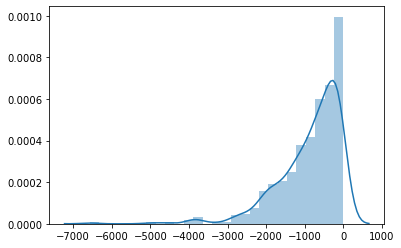

In [14]:
scores_lin = cross_val_score(lin, X, y, scoring='neg_mean_squared_error', cv=500)
plot = sns.distplot(scores_lin)

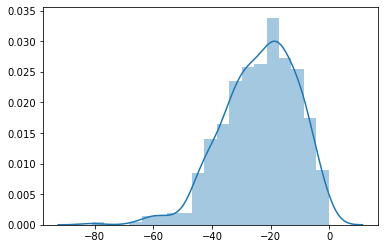

In [15]:
scores_lin = cross_val_score(lin, X, y, scoring='neg_mean_absolute_error', cv=500)
plot = sns.distplot(scores_lin)